In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import assoc_laguerre
from mpl_toolkits.mplot3d import Axes3D
import math

In [3]:
#定义函数
def Ylm(m, l, theta, phi):
    return sph_harm(m, l, theta, phi)

def Laguerre(n, l, r, a):
    return assoc_laguerre(2*r/(a*n), n-l-1, 2*l+1)

def Psi(n, l, m, r, theta, phi, a):
    return np.sqrt( (2/(n*a))**3 * np.math.factorial(n-l-1) / (2*n*(n+1))) * np.exp(-r/(n*a)) * (2*r/(n*a))**l * Ylm(m, l, theta, phi) * Laguerre(n, l, r, a)

def Probability(n, l, m, r, theta, phi, a):
    probability = np.conjugate(Psi(n, l, m, r, theta, phi, a)) * Psi(n, l, m, r, theta, phi, a)
    probability = probability.real
    return probability

def R(x, y, z):
    return np.linalg.norm((x,y,z), axis = 0)

def Theta(x, y, z):
    return np.arctan2(y, x)

def Phi(x, y, z):
    return np.arctan2(np.linalg.norm((x,y), axis=0), z)

def P(n, l, m, x, y, z, a):
    t = 30/(n**2)
    return Probability(n, l, m, R((x-25)/t, (y-25)/t, (z-25)/t), Theta((x-25)/t, (y-25)/t, (z-25)/t), Phi((x-25)/t, (y-25)/t, (z-25)/t), a)

# def Psi_3D(n, l, m, x, y, z, a):
#     t = 25/(n**2)
#     return Psi(n, l, m, R((x-25)/t, (y-25)/t, (z-25)/t), Theta((x-25)/t, (y-25)/t, (z-25)/t), Phi((x-25)/t, (y-25)/t, (z-25)/t), a)

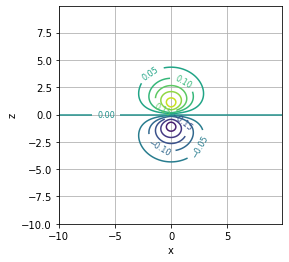

In [16]:
a0=0.5292

def draw(n,l,m):
    step = 0.1
    x = np.arange(-10,10,step)
    y = np.arange(-10,10,step)
    X,Y = np.meshgrid(x,y)
    plt.figure(figsize=(4,4))
    plt.ylabel('z')
    plt.xlabel('x')
    plt.grid(True)
    C = plt.contour(X, Y, Psi(n, l, m ,np.sqrt(X**2+Y**2), np.pi/2, np.arctan2(X,Y),a0), 10)
    
    plt.clabel(C, inline=True, fontsize=8)
    plt.show()

draw(2,1,0)

/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


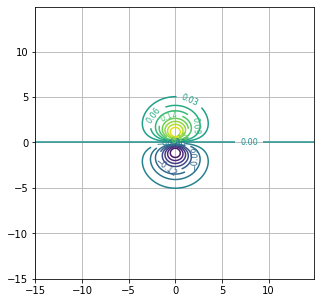

0 0


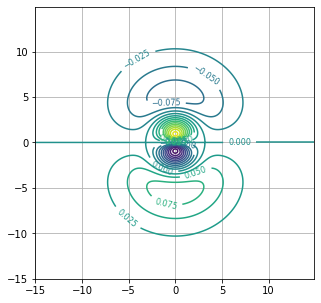

0 1


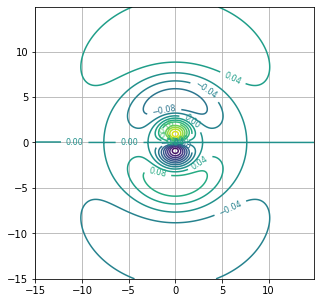

0 2


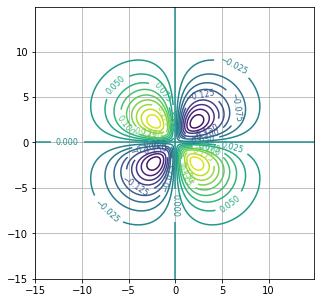

1 0


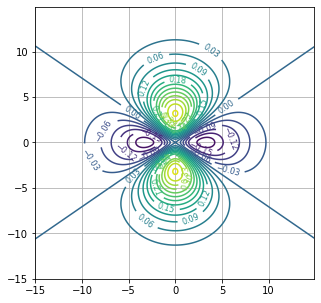

1 1


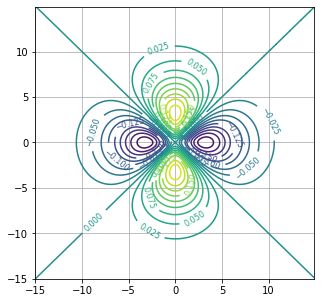

1 2


In [18]:
# fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)


# axs[0,0].set_ylabel('y')
# axs[1,0].set_ylabel('y')

# axs[1,0].set_xlabel('x')
# axs[1,1].set_xlabel('x')
# axs[1,2].set_xlabel('x')
i=0
numberSets = [[2,1,0],[3,1,0],[4,1,0],[3, 2, 2],[3,2,0],[3,2,-2]]
# for c in range(2):
#     for row in range(3):
        
#         numberSet = numberSets[i]
#         step = 0.1
#         x = np.arange(-15,15,step)
#         y = np.arange(-15,15,step)
#         X,Y = np.meshgrid(x,y)
#         axs[c,row].grid(True)


#         WaveFunction = Psi(numberSet[0], numberSet[1], numberSet[2] ,np.sqrt(X**2+Y**2), np.pi/2, np.arctan2(X,Y),a0)

#         axs[c,row].contour(X, Y, WaveFunction, 10)
#         # plt.clabel(C, inline=True, fontsize=8)
#         i=i+1
#         print(c,row)

for c in range(2):
    for row in range(3):
        numberSet = numberSets[i]
        step = 0.1
        x = np.arange(-15,15,step)
        y = np.arange(-15,15,step)
        X,Y = np.meshgrid(x,y)
        plt.figure(figsize=(5,5))
        plt.grid(True)

        if (c==1 and row==0):
            WaveFunction = Psi(numberSet[0], numberSet[1], numberSet[2] ,np.sqrt(X**2+Y**2),  np.arctan2(X,Y)+np.pi/4,np.pi/2,a0)
        elif (c==1 and row ==2):
            WaveFunction = Psi(numberSet[0], numberSet[1], numberSet[2] ,np.sqrt(X**2+Y**2), np.arctan2(X,Y),np.pi/2,a0)
        else:
            WaveFunction = Psi(numberSet[0], numberSet[1], numberSet[2] ,np.sqrt(X**2+Y**2), np.pi/2, np.arctan2(X,Y),a0)
            
        C=plt.contour(X, Y, WaveFunction, 20)

        plt.clabel(C, inline=True, fontsize=8)
        
        plt.savefig("WaveFunction"+str(c)+" "+str(row)+".jpg",dpi=300)
        plt.show()
        # plt.clabel(C, inline=True, fontsize=8)
        i=i+1
        print(c,row)



# # 加个 样条图例
# fig.colorbar(plt.cm.ScalarMappable(cmap=cm.Spectral,norm=cNorm),ax=axs[:2],label = "Colorbar")

# plt.savefig("WaveFunction.jpg",dpi = 300)
# plt.show()